**How it Works:**

* Read in an image into Python using OpenCV.
* Apply Filtering,edge detection & use contour search to find Number Plates.
* Extract text using OCR with EasyOCR.

**We'll be Using Opencv, EasyOCR**
* Opencv is used to detect Number plate
* EasyOCR is used to extract text from an Image

* Since EasyOCR is implemented using Python and PYTORCH Library
* First we need to install Pytorch into our windows/Linux/Mac and then Easyocr.

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 41.1 MB/s eta 0:00:00


In [ ]:
!pip install imutils

## 1. Install and Import Dependencies

In [ ]:
import easyocr
import cv2 as cv
import imutils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


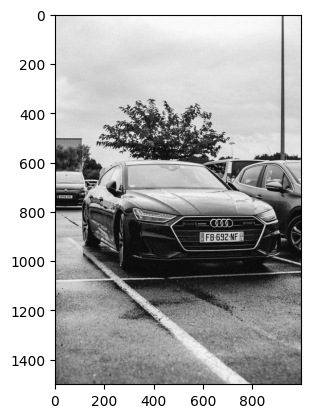

In [48]:
img  = cv.imread("/Image.jpeg")
grey = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
plt.imshow(cv.cvtColor(grey , cv.COLOR_BGR2RGB))  #sine matplotlib expects to show RGB

## 2. Applying Filter and Edge Detection for Localization

* Filtering is basically to remove noise from the image.
* Edge detection is going to detect edges in an Image

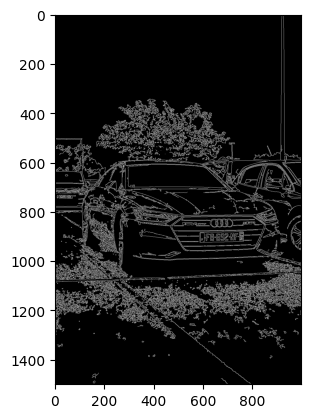

In [49]:
bfilter = cv.bilateralFilter(grey , 11 ,17 , 17)#noise reduction by bilaterql filter
edged = cv.Canny(bfilter , 30 , 200) #edge detection
plt.imshow(cv.cvtColor(edged , cv.COLOR_BGR2RGB))

## Finding contours

* Countour detection is nothing but detecting a polygons.
* Here we need to find a rectangle having 4 points since every number plate is of shape Rectangle.

In [50]:
keypoints = cv.findContours(edged.copy() , cv.RETR_TREE , cv.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv.contourArea, reverse = True)[:10]

Here while finding contours we have included 2 argumnets:
* cv.RETR_TREE: it retrieves all of the contours and reconstructs a full hierarchy of nested contours.
* cv.CHAIN_APPROX_SIMPLE is the contour approximation method (it compresses horizontal, diagonal, and vertical segments and leaves only their end points.

* finally sorted the contours by their Area and sliced to top 10 contours.

## 4. Looping through each of these contours

* To see whether these contours are sqaures / Number plate.

In [51]:
loaction = None
for contour in contours:
  approx = cv.approxPolyDP(contour , 10 ,True)
  if len(approx) == 4:
    location = approx
    break

In [52]:
location

array([[[763, 884]],

       [[588, 885]],

       [[586, 925]],

       [[763, 921]]], dtype=int32)

## Masking the Number PLate

* Isolating that Number plate contour with the help of Masking.

In [53]:
mask = np.zeros(grey.shape , np.uint8)    #CREATED A BLACK MASK OF ORIGINAL GREY IMAGE
new_image = cv.drawContours(mask, [location], 0 , 255, -1)
new_image = cv.bitwise_and(img , img, mask = mask)

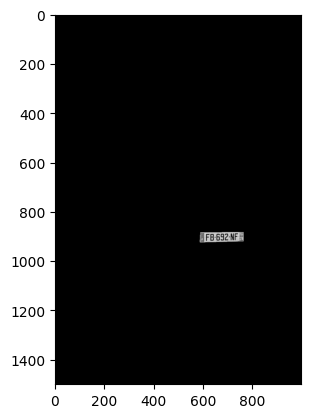

In [54]:
plt.imshow(cv.cvtColor(new_image , cv.COLOR_BGR2RGB))

In [55]:
(x,y) = np.where(mask==255)  #finding the image where it isnt black
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
cropped_img = grey[x1:x2+1 , y1:y2+1] #giving a little bit buffer


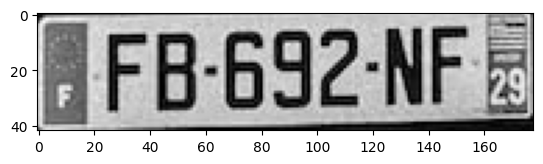

In [56]:
plt.imshow(cv.cvtColor(cropped_img, cv.COLOR_BGR2RGB))

## 5. using EasyOCR to read the text in the image.

In [57]:
reader = easyocr.Reader(["en"])
result = reader.readtext(cropped_img)
result

[([[19, 0], [161, 0], [161, 41], [19, 41]], 'FB 692-NF', 0.7710669976342095)]

## 6. Rendering Result

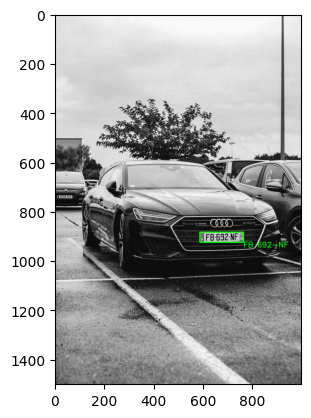

In [58]:
text = result[0][-2]
font = cv.FONT_HERSHEY_SIMPLEX
res = cv.putText(img , text=text , org = (approx[0][0][0] , approx[1][0][1]+60) , fontFace = font , fontScale = 1 , color =(0,255,0), thickness = 2)
res = cv.rectangle(img , tuple(approx[0][0]) , tuple(approx[2][0] ), (0,255,0), 3)
plt.imshow(cv.cvtColor(res , cv.COLOR_BGR2RGB))